## Covid-19 Fake news Detection - LSTM

### Importing required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Loading dataset and giving name to columns

In [2]:
df=pd.read_csv('covidnews.txt', sep="\t", header=None)
df.columns = ["label", "text"]

In [3]:
df.head()

,label,text
0,0,live launch of the access to covid tools act...
1,0,live one world togetherathome covid
2,1,dettol kills the coronavirus so it is not new
3,1,one thing for sure drink enough bleach and t...
4,1,isn t that horrible china has a patent on th...


In [4]:
# counting the number of missing values in the dataset
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [6]:
## Get the Dependent features
y=df['label']

In [7]:
X.shape

(22000, 1)

In [8]:
y.shape

(22000,)

In [9]:
### Vocabulary size
voc_size=5000

In [10]:
messages=X.copy()

In [11]:
messages['text'][1]

'  live one world togetherathome covid'

In [12]:
messages.reset_index(inplace=True)

### Preprocessing the data using NLP 

In [13]:
### Dataset Preprocessing

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
corpus

['live launch access covid tool act acceler',
 'live one world togetherathom covid',
 'dettol kill coronaviru new',
 'one thing sure drink enough bleach coronaviru kill',
 'horribl china patent viru alreadi laboratori bill gate own patent vaccin alreadi',
 'condit continu bodi becom suscept coronaviru rememb better prevent cure',
 'omg man voic cure coronaviru',
 'hr chines govern drop blister pack tamiflu amp kaletra gener tablet drone helicopt onto quarantin citi street drug interact warn wuhan ncov wuhanpneumonia coronaviru',
 'covid myth buster knowthefact',
 'ivanka trump person assist test posit covid',
 'import vaccin research amp product h',
 'one church mom got essenti oil hook cure coronaviru',
 'also bill gate predict coronaviru year ago step microsoft recent',
 'ever gone bathroom djai immun coronaviru',
 'twt nomeat nocoronaviru sat bhakti cure diseas like aid cancer well avoid corona v',
 'watch live celebr comedian come togeth one world concert celebr front line health c

In [16]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4575, 4333, 1666, 3139, 2661, 3049, 4109],
 [4575, 3942, 3981, 3165, 3139],
 [3307, 4479, 3412, 4350],
 [3942, 609, 4490, 2116, 4384, 953, 3412, 4479],
 [3669, 4186, 2323, 2027, 506, 4660, 4067, 3487, 261, 2323, 997, 506],
 [1412, 3193, 1824, 582, 2776, 3412, 2129, 1915, 4240, 1379],
 [4189, 4090, 1534, 1379, 3412],
 [4496,
  3238,
  4147,
  3243,
  920,
  4094,
  776,
  2639,
  1446,
  7,
  3991,
  727,
  4464,
  2526,
  3114,
  908,
  4772,
  1149,
  499,
  2418,
  4549,
  4513,
  3491,
  3412],
 [3139, 3019, 573, 1037],
 [763, 3557, 2073, 553, 4308, 2057, 3139],
 [1802, 997, 4820, 2639, 1101, 612],
 [3942, 3048, 2391, 554, 3369, 35, 4737, 1379, 3412],
 [4663, 4067, 3487, 3799, 3412, 2567, 2734, 3119, 1470, 2412],
 [1926, 3743, 1289, 1917, 3974, 3412],
 [445,
  1781,
  4981,
  1553,
  2695,
  1379,
  793,
  2478,
  425,
  4519,
  4704,
  3292,
  4266,
  390],
 [954,
  4575,
  2850,
  3912,
  4481,
  480,
  3942,
  3981,
  3719,
  2850,
  2213,
  201,
  1872,
  3834,
  910,
  919,
 

In [17]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2661 3049 4109]
 [   0    0    0 ... 3981 3165 3139]
 [   0    0    0 ... 4479 3412 4350]
 ...
 [   0    0    0 ... 4414 3295 3139]
 [   0    0    0 ...   67  337  185]
 [   0    0    0 ...  997 3721 4298]]


In [18]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 4575, 4333, 1666, 3139, 2661, 3049, 4109])

### Defining Model-LSTM

In [19]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
len(embedded_docs),y.shape

(22000, (22000,))

In [21]:

X_final=np.array(embedded_docs)
y_final=np.array(y)

In [22]:
X_final.shape,y_final.shape

((22000, 30), (22000,))

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [24]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
231/231 [==============================] - 21s 71ms/step - loss: 0.2188 - accuracy: 0.9065 - val_loss: 0.0957 - val_accuracy: 0.9691
Epoch 2/10
231/231 [==============================] - 19s 81ms/step - loss: 0.0682 - accuracy: 0.9803 - val_loss: 0.1008 - val_accuracy: 0.9665
Epoch 3/10
231/231 [==============================] - 19s 83ms/step - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.1066 - val_accuracy: 0.9656
Epoch 4/10
231/231 [==============================] - 19s 83ms/step - loss: 0.0324 - accuracy: 0.9921 - val_loss: 0.1385 - val_accuracy: 0.9638
Epoch 5/10
231/231 [==============================] - 19s 83ms/step - loss: 0.0306 - accuracy: 0.9915 - val_loss: 0.1426 - val_accuracy: 0.9618
Epoch 6/10
231/231 [==============================] - 19s 84ms/step - loss: 0.0230 - accuracy: 0.9942 - val_loss: 0.1500 - val_accuracy: 0.9585
Epoch 7/10
231/231 [==============================] - 20s 86ms/step - loss: 0.0203 - accuracy: 0.9950 - val_loss: 0.1839 - val_accuracy:

In [25]:
#y_pred=model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5)*1 

In [26]:
confusion_matrix(y_test,y_pred)

array([[3493,  171],
       [ 129, 3467]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.9586776859504132

In [28]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9644    0.9533    0.9588      3664
           1     0.9530    0.9641    0.9585      3596

    accuracy                         0.9587      7260
   macro avg     0.9587    0.9587    0.9587      7260
weighted avg     0.9587    0.9587    0.9587      7260



### Plotting the history of Loss and Accuracy

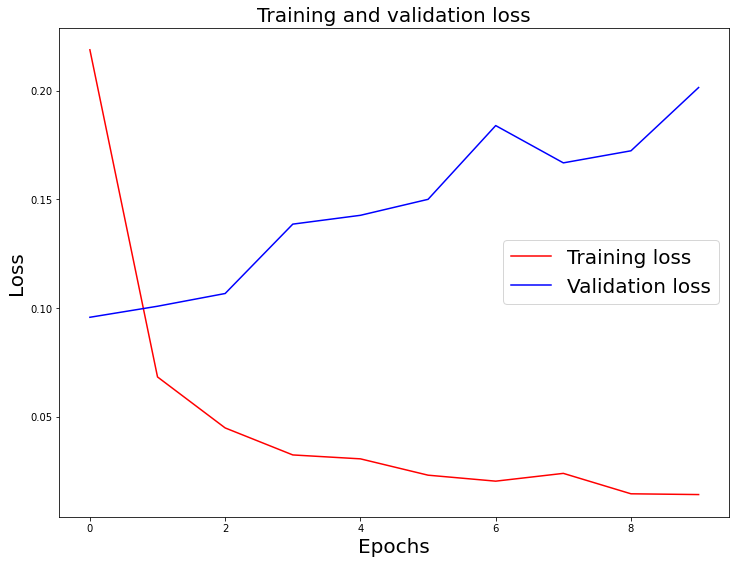

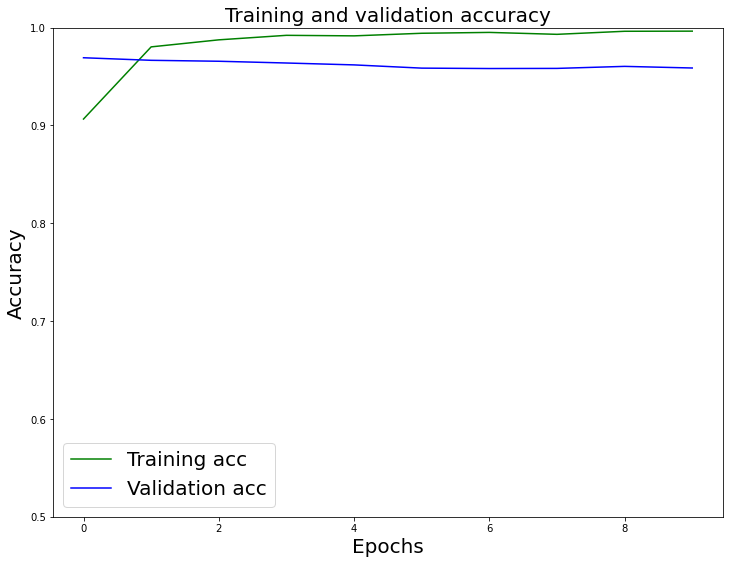

In [29]:

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [30]:
#from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 40)            200000    
                                                                 
 dropout_1 (Dropout)         (None, 30, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
231/231 [==============================] - 12s 42ms/step - loss: 0.2596 - accuracy: 0.8950 - val_loss: 0.1140 - val_accuracy: 0.9635
Epoch 2/10
231/231 [==============================] - 10s 43ms/step - loss: 0.0859 - accuracy: 0.9727 - val_loss: 0.0951 - val_accuracy: 0.9686
Epoch 3/10
231/231 [==============================] - 12s 52ms/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0973 - val_accuracy: 0.9680
Epoch 4/10
231/231 [==============================] - 13s 56ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.1060 - val_accuracy: 0.9661
Epoch 5/10
231/231 [==============================] - 12s 53ms/step - loss: 0.0396 - accuracy: 0.9889 - val_loss: 0.1136 - val_accuracy: 0.9660
Epoch 6/10
231/231 [==============================] - 14s 59ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.1213 - val_accuracy: 0.9649
Epoch 7/10
231/231 [==============================] - 14s 60ms/step - loss: 0.0284 - accuracy: 0.9918 - val_loss: 0.1318 - val_accuracy:

In [33]:
#y_pred=model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5)*1 

In [34]:
confusion_matrix(y_test,y_pred)

array([[3461,  203],
       [  90, 3506]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.9596418732782369

In [36]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9747    0.9446    0.9594      3664
           1     0.9453    0.9750    0.9599      3596

    accuracy                         0.9596      7260
   macro avg     0.9600    0.9598    0.9596      7260
weighted avg     0.9601    0.9596    0.9596      7260



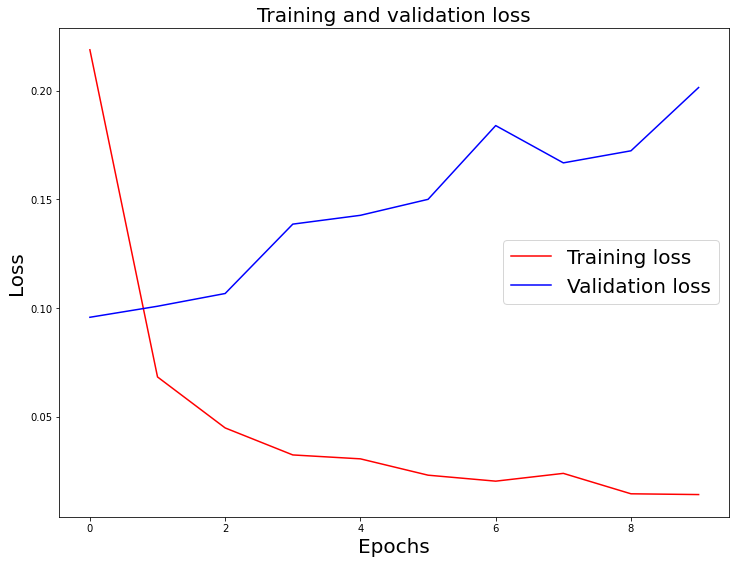

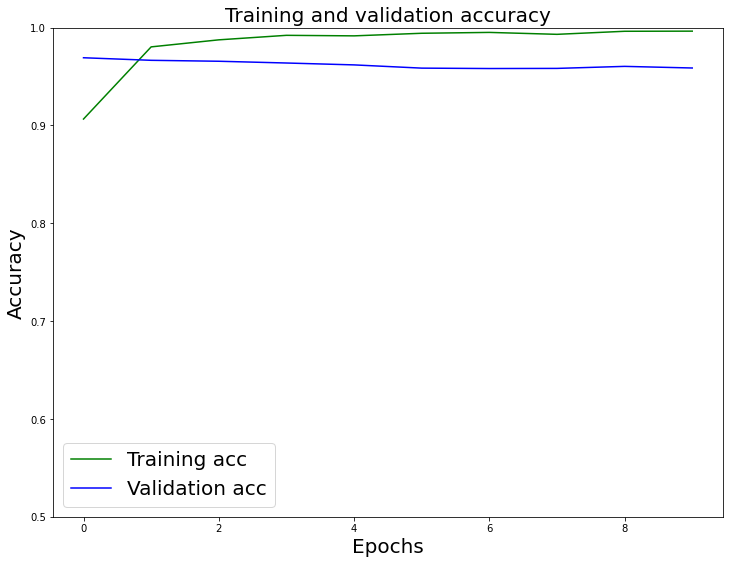

In [37]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()